In [58]:
!pip install wordcloud

In [59]:
!pip install -U spacy

In [60]:
import re
import string
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English



In [61]:
df=pd.read_csv('/content/fake_job_postings.csv')

In [62]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [63]:
df.shape

(17880, 18)

to check the  null values


In [64]:
df.isnull().sum()
print(df.columns)

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')


dropping columns of null value

In [65]:
print(df.columns)
columns=['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'salary_range', 'employment_type']
for colu in columns:
  del df[colu]

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')


In [66]:
df.head()
print(df.columns)

Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent'],
      dtype='object')


In [67]:
df.fillna('',inplace=True)




compare fraudulent and non -fraudulent

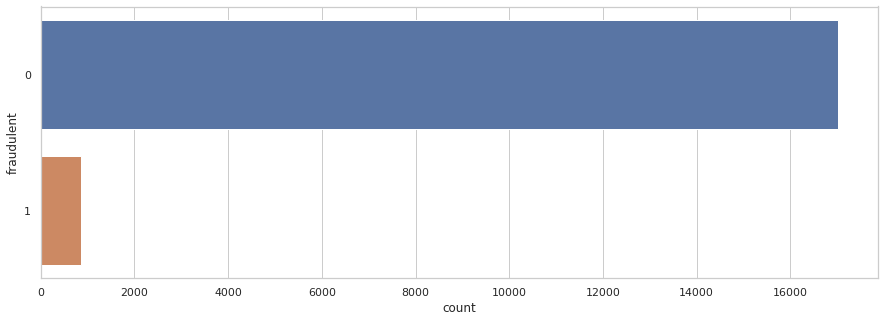

In [68]:
plt.figure(figsize=(15,5))
sns.countplot(y='fraudulent',data=df)
plt.show()

In [69]:
df.groupby('fraudulent')['fraudulent'].count()

fraudulent
0    17014
1      866
Name: fraudulent, dtype: int64

In [70]:
exp = dict(df.required_experience.value_counts())
del exp['']



In [71]:
exp
df.columns

Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent'],
      dtype='object')

In [72]:
tit = dict(df.title.value_counts())
tit


{'English Teacher Abroad ': 311,
 'Customer Service Associate ': 146,
 'Graduates: English Teacher Abroad (Conversational)': 144,
 'English Teacher Abroad': 95,
 'Software Engineer': 86,
 'English Teacher Abroad (Conversational)': 83,
 'Customer Service Associate - Part Time ': 76,
 'Account Manager': 75,
 'Web Developer': 66,
 'Project Manager': 62,
 'Beauty & Fragrance consultants needed': 60,
 'Graduates: English Teacher Abroad ': 57,
 'Customer Service Representative': 51,
 'Administrative Assistant': 48,
 'Product Manager': 47,
 'Office Manager': 46,
 'Marketing Manager': 45,
 'Sales Representative': 45,
 'Customer Service Associate': 45,
 'iOS Developer': 44,
 'Web Designer': 44,
 'Senior Software Engineer': 44,
 'Account Executive': 41,
 'Customer Service Team Lead ': 40,
 'Front End Developer': 38,
 'Sales Manager': 37,
 'Software Developer': 36,
 'Android Developer': 33,
 'Contact Center Representatives': 31,
 'Data Scientist': 31,
 'Business Analyst': 30,
 'Java Developer': 2

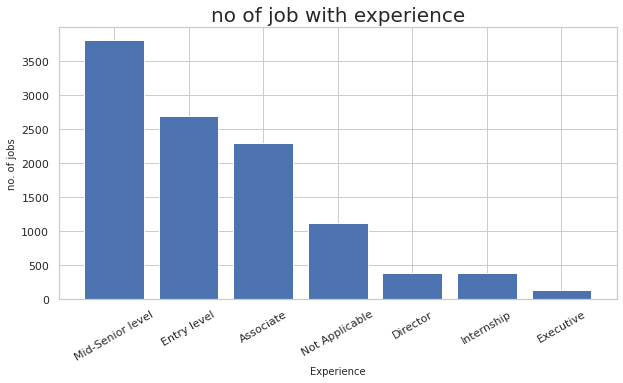

In [73]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
plt.bar(exp.keys(), exp.values())
plt.title('no of job with experience',size=20)
plt.xlabel('Experience', size=10)
plt.ylabel('no. of jobs', size=10)
plt.xticks(rotation=30)
plt.show()



no of jobs posted based on country

In [74]:
def split(location):
  l = location.split(',')
  return l[0]
  

In [75]:
df['country'] = df.location.apply(split)

In [76]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


top 10 countries

In [77]:
countr= dict(df.country.value_counts()[:15])
del countr['']
countr 
print(df.columns)

Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent', 'country'],
      dtype='object')


Text(0.5, 0, 'Countries')

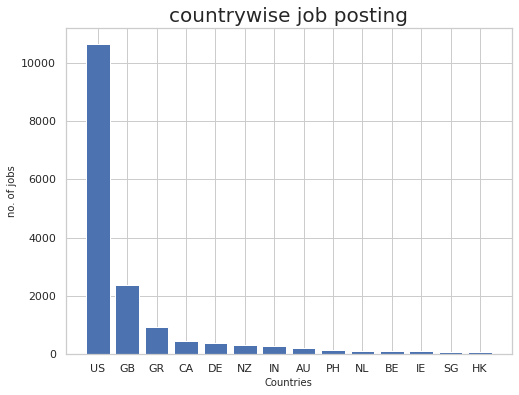

In [78]:
plt.figure(figsize=(8,6))
plt.title('countrywise job posting', size = 20)
plt.bar(countr.keys(), countr.values())
plt.ylabel('no. of jobs', size=10)
plt.xlabel('Countries',size=10)

no. of jobs for each education level

In [79]:
edu = dict(df.required_education.value_counts()[:7])
del edu['']
edu

{'Associate Degree': 274,
 "Bachelor's Degree": 5145,
 'Certification': 170,
 'High School or equivalent': 2080,
 "Master's Degree": 416,
 'Unspecified': 1397}

Text(0.5, 0, 'education, size=10')

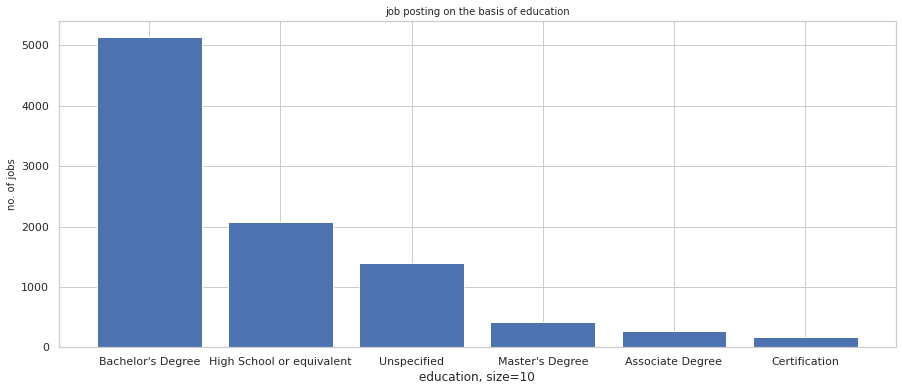

In [80]:
plt.figure(figsize=(15,6))
plt.title('job posting on the basis of education', size=10)
plt.bar(edu.keys(), edu.values())
plt.ylabel('no. of jobs', size=10)
plt.xlabel('education, size=10')

most commonly used top 12 titles when job posted is not fraudulent


In [81]:
print(df[df.fraudulent==0].title.value_counts()[:12])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Beauty & Fragrance consultants needed                  60
Graduates: English Teacher Abroad                      57
Name: title, dtype: int64


most commonly used top 12 titles when job posted is fraudulent

In [82]:
print(df[df.fraudulent==1].title.value_counts()[:12])

Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Data Entry Admin/Clerical Positions - Work From Home                    21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Network Marketing                                                       10
Account Sales Managers $80-$130,000/yr                                  10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Data Entry                                                               9
Agency Sales Managers $150-$175,000/yr                                   9
Name: title, dtype: int64


In [83]:
print(df[df.fraudulent==1].department.value_counts()[:12])

                           531
Engineering                 46
Clerical                    27
Oil & Energy                24
Information Technology      15
Customer Service            14
Administrative              14
Sales                       12
Information Technology      12
Engineering                  9
admin                        7
Accounting/Payroll           6
Name: department, dtype: int64


In [84]:
df.columns
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [85]:
df['text'] = df['title']+' '+df['company_profile']+' '+df['description']+' '+df['requirements']+' '+df['benefits']
  

In [86]:
del df['title']
del df['location']
del df['department']
del df['company_profile']
del df['description']
del df['requirements']
del df['benefits']
del df['required_experience']
del df['required_education']
del df['industry']
del df['function']
del df['country']

In [87]:
df.head()

,fraudulent,text
0,0,"Marketing Intern We're Food52, and we've creat..."
1,0,Customer Service - Cloud Video Production 90 S...
2,0,Commissioning Machinery Assistant (CMA) Valor ...
3,0,Account Executive - Washington DC Our passion ...
4,0,Bill Review Manager SpotSource Solutions LLC i...


In [88]:
fraudjobs_text = df[df.fraudulent==1].text
realjobs_text = df[df.fraudulent==0].text

#wordcloud for text present in  fraudulent jobs

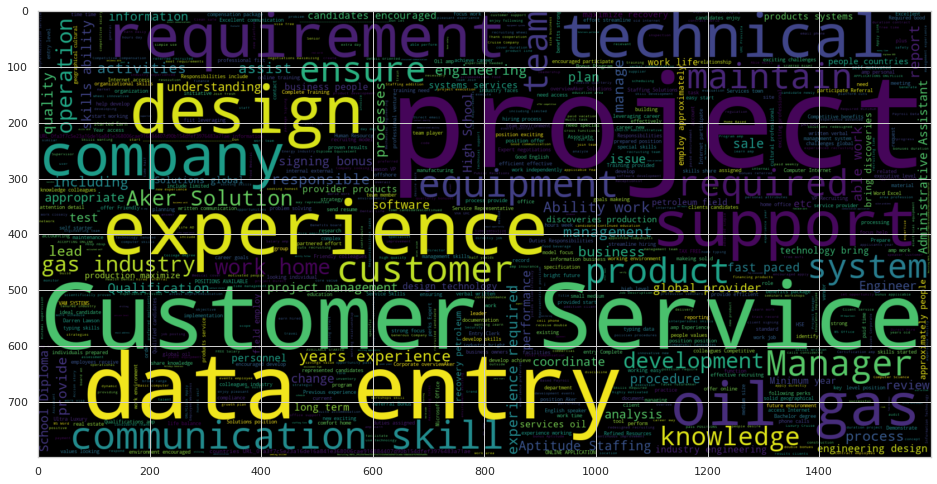

In [89]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc= WordCloud(min_font_size = 3, max_words = 3000, width = 1600, height = 800, stopwords = STOPWORDS).generate(str("".join(fraudjobs_text)))
plt.imshow(wc, interpolation = 'bilinear')

In [90]:
#wordcloud for text present in non fraudulent jobs

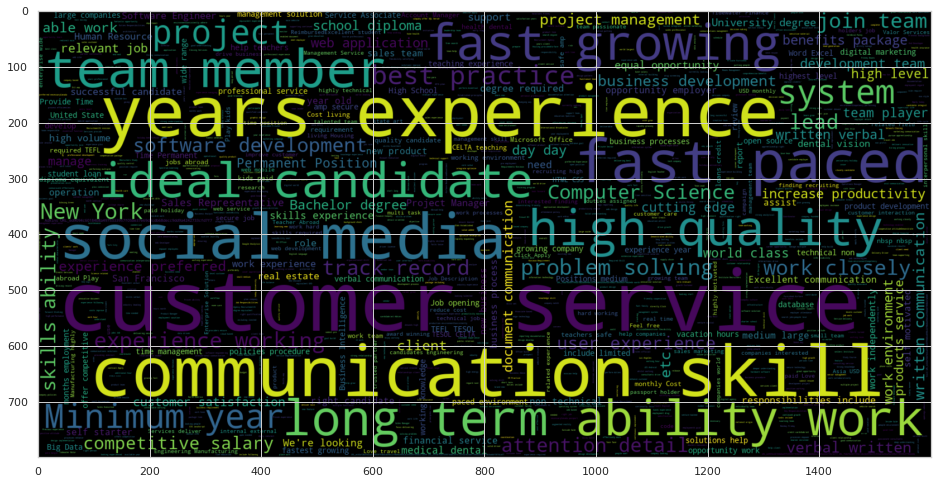

In [91]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc= WordCloud(min_font_size = 3, max_words = 3000, width = 1600, height = 800, stopwords = STOPWORDS).generate(str("".join(realjobs_text)))
plt.imshow(wc, interpolation = 'bilinear')

In [92]:
!pip install spacy && python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     |████████████████████████████████| 13.6 MB 70 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


Now, preprocessing the data
1) List of punctuation mark, then stop words, tokenizers, passers and word vectors. Then create tokeniser function.
2) Then convert into lower case and remove all the stop words.

In [93]:
punctuations = string.punctuation

nlp = spacy.load("en_core_web_sm")
stop_words = spacy.lang.en.stop_words.STOP_WORDS
parser = English()
def spacy_tokenizer(sentence):
  mytokens = parser (sentence)
  mytokens = [word.lemma_.lower().strip() if word.lemma_ !="-PRON-" else word.lower_ for word in mytokens]
  mytokens = [word for word in mytokens if word not in stop_words and word not in punctutions]
  return mytokens


Customed transform using spacy: Cleaning the text

In [94]:
class predictors(TransformerMixin):
  def transform(self, X, **transform_params):
    return [clean_text(text) for text in x]

  def fit(self,x, y=None, **fit_params):
    return self
  def get_params(self, deep=True):
    return{}


remove spaces and convert text into lower case

In [95]:
def clean_text(text):
  return text.strip().lower()


In [96]:
df['text'] =df['text'].apply(clean_text)

Tfidf vectorizer: give equal weightage to all words. words act like column. It also shows how important a word is for the document

apply Tfidf to x

In [97]:
cv = TfidfVectorizer(max_features = 100)
x = cv.fit_transform(df['text'])
df1 = pd.DataFrame(x.toarray(), columns=cv.get_feature_names())
df.drop(["text"], axis =1, inplace=True)
main_df = pd.concat([df1,df], axis=1)

In [98]:
main_df.head()

,ability,about,all,also,amp,an,and,are,as,at,based,be,best,business,but,by,can,client,clients,communication,company,customer,customers,data,design,development,do,environment,experience,for,from,full,has,have,help,high,if,in,including,industry,...,product,products,project,provide,quality,re,required,sales,service,services,skills,software,solutions,strong,support,team,technical,technology,that,the,their,this,through,time,to,up,us,we,web,well,who,will,with,work,working,world,years,you,your,fraudulent
0,0.000000,0.041120,0.000000,0.042424,0.036488,0.000000,0.755238,0.000000,0.078653,0.000000,0.000000,0.000000,0.043071,0.034178,0.040130,0.131541,0.000000,0.000000,0.000000,0.037122,0.031382,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.023411,0.081456,0.000000,0.039904,0.086128,0.054325,0.000000,0.00000,0.0,0.238944,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.12972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.127976,0.053706,0.0,0.041037,0.000000,0.291636,0.069614,0.000000,0.000000,0.032185,0.184005,0.000000,0.000000,0.204948,0.000000,0.040199,0.000000,0.000000,0.186067,0.051026,0.068029,0.000000,0.000000,0.000000,0.000000,0
1,0.021895,0.094183,0.035394,0.024292,0.041787,0.029771,0.490896,0.056626,0.060050,0.052431,0.043397,0.043898,0.000000,0.078283,0.000000,0.075322,0.085429,0.053200,0.048722,0.021256,0.000000,0.115046,0.000000,0.0,0.0,0.000000,0.051697,0.022003,0.093836,0.151587,0.089252,0.000000,0.098635,0.062214,0.000000,0.04378,0.0,0.193831,0.136651,0.000000,...,0.025735,0.0,0.174234,0.000000,0.050263,0.00000,0.000000,0.000000,0.220411,0.000000,0.017473,0.025821,0.000000,0.000000,0.000000,0.046129,0.0,0.000000,0.107736,0.453268,0.000000,0.070882,0.000000,0.018429,0.152191,0.000000,0.019987,0.130395,0.026812,0.000000,0.000000,0.078004,0.165735,0.043827,0.116862,0.099327,0.000000,0.204854,0.130452,0
2,0.000000,0.000000,0.176807,0.000000,0.041749,0.089231,0.397029,0.113149,0.000000,0.000000,0.000000,0.029239,0.000000,0.000000,0.000000,0.037626,0.000000,0.159456,0.000000,0.000000,0.071812,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.116499,0.035668,0.000000,0.049272,0.000000,0.000000,0.00000,0.0,0.113914,0.000000,0.050261,...,0.000000,0.0,0.058025,0.046249,0.050217,0.00000,0.000000,0.000000,0.000000,0.219864,0.069826,0.000000,0.048159,0.094592,0.048809,0.000000,0.0,0.000000,0.215275,0.524358,0.000000,0.000000,0.048008,0.000000,0.350889,0.000000,0.000000,0.026055,0.000000,0.000000,0.000000,0.062346,0.307512,0.058383,0.000000,0.000000,0.000000,0.094462,0.074476,0
3,0.023267,0.000000,0.018806,0.000000,0.000000,0.094909,0.695542,0.000000,0.031906,0.037144,0.000000,0.015550,0.000000,0.145581,0.024418,0.020010,0.000000,0.000000,0.000000,0.022588,0.019095,0.024451,0.054739,0.0,0.0,0.045661,0.054937,0.070146,0.085471,0.123912,0.000000,0.000000,0.000000,0.016528,0.022762,0.00000,0.0,0.084814,0.096809,0.053459,...,0.000000,0.0,0.000000,0.049192,0.053412,0.00000,0.024291,0.173103,0.000000,0.023385,0.018567,0.000000,0.051223,0.025153,0.025957,0.065359,0.0,0.099884,0.049066,0.278862,0.042360,0.000000,0.127657,0.019584,0.335896,0.023612,0.000000,0.069283,0.000000,0.000000,0.023132,0.049735,0.075480,0.046573,0.000000,0.105551,0.019806,0.050236,0.059411,0
4,0.000000,0.000000,0.068009,0.000000,0.040147,0.028602,0.606379,0.081605,0.115386,0.000000,0.000000,0.028117,0.094780,0.037605,0.000000,0.000000,0.000000,0.051112,0.000000,0.040844,0.069056,0.044212,0.049490,0.0,0.0,0.041282,0.000000,0.000000,0.051516,0.201651,0.000000,0.043906,0.047382,0.000000,0.000000,0.00000,0.0,0.394354,0.043762,0.000000,...,0.000000,0.0,0.000000,0.000000,0.144870,0.00000,0.000000,0.000000,0.084704,0.169141,0.000000,0.000000,0.092621,0.000000,0.000000,0.029545,0.0,0.000000,0.029574,0.275038,0.000000,0.000000,0.000000,0.035412,0.269940,0.000000,0.000000,0.050111,0.000000,0.044230,0.000000,0.000000,0.159230,0.028071,0.037425,0.000000,0.035814,0.030279,0.107427,0


train and test the data. frauulant in y, remaining all in x.

In [99]:
Y = main_df.iloc[:,-1]
X = main_df.iloc[:,:-1]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(12516, 100)
(12516,)
(5364, 100)
(5364,)


Applying random forest and train the model

In [100]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=3, oob_score=True, n_estimators=100, criterion = "entropy")
model= rfc.fit(X_train, Y_train)

In [101]:
print(X_test)

        ability     about       all  ...     years       you      your
10404  0.019335  0.020793  0.078138  ...  0.000000  0.264394  0.115198
8366   0.039841  0.000000  0.000000  ...  0.033916  0.086023  0.000000
13406  0.000000  0.000000  0.000000  ...  0.000000  0.350496  0.118431
212    0.104505  0.000000  0.084468  ...  0.044481  0.000000  0.000000
3110   0.080074  0.000000  0.000000  ...  0.000000  0.057630  0.000000
...         ...       ...       ...  ...       ...       ...       ...
1778   0.029428  0.000000  0.047572  ...  0.025051  0.465957  0.050096
926    0.000000  0.000000  0.090011  ...  0.000000  0.080150  0.094788
11046  0.000000  0.000000  0.046914  ...  0.049410  0.020887  0.000000
14078  0.000000  0.000000  0.057554  ...  0.060616  0.051249  0.000000
11766  0.045946  0.000000  0.055705  ...  0.000000  0.082671  0.039108

[5364 rows x 100 columns]


In [102]:
pred = rfc.predict(X_test)
score = accuracy_score(Y_test, pred)
score

0.9725950782997763

In [103]:
print("Classification Report\n")
print(classification_report(Y_test, pred))
print("Confusion Matrix\n")
print(confusion_matrix(Y_test,pred))

Classification Report

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5105
           1       1.00      0.43      0.60       259

    accuracy                           0.97      5364
   macro avg       0.99      0.72      0.79      5364
weighted avg       0.97      0.97      0.97      5364

Confusion Matrix

[[5105    0]
 [ 147  112]]


In [104]:
from sklearn import svm
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)
cls = svm.SVC(kernel = "linear")
cls.fit(X_train, Y_train)
pred = cls.predict(X_test)
score1= accuracy_score(Y_test,pred )
score1


0.9537658463832961

In [105]:
print("Classification Report\n")
print(classification_report(Y_test, pred))
print("Confusion Matrix\n")
print(confusion_matrix(Y_test,pred))

Classification Report

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      5116
           1       0.00      0.00      0.00       248

    accuracy                           0.95      5364
   macro avg       0.48      0.50      0.49      5364
weighted avg       0.91      0.95      0.93      5364

Confusion Matrix

[[5116    0]
 [ 248    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
pred2= model.predict(X_test)
pred2

array([0, 0, 0, ..., 0, 0, 0])

In [111]:
model.score(X_test,Y_test)

0.9589858314690529

In [113]:
print("Classification Report\n")
print(classification_report(Y_test, pred2))
print("Confusion Matrix\n")
print(confusion_matrix(Y_test,pred2))

Classification Report

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5116
           1       0.73      0.18      0.29       248

    accuracy                           0.96      5364
   macro avg       0.85      0.59      0.63      5364
weighted avg       0.95      0.96      0.95      5364

Confusion Matrix

[[5100   16]
 [ 204   44]]
